<a href="https://colab.research.google.com/github/Arnav613Gupta/machine_learning/blob/main/SVM_Classifier_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM Classifier**

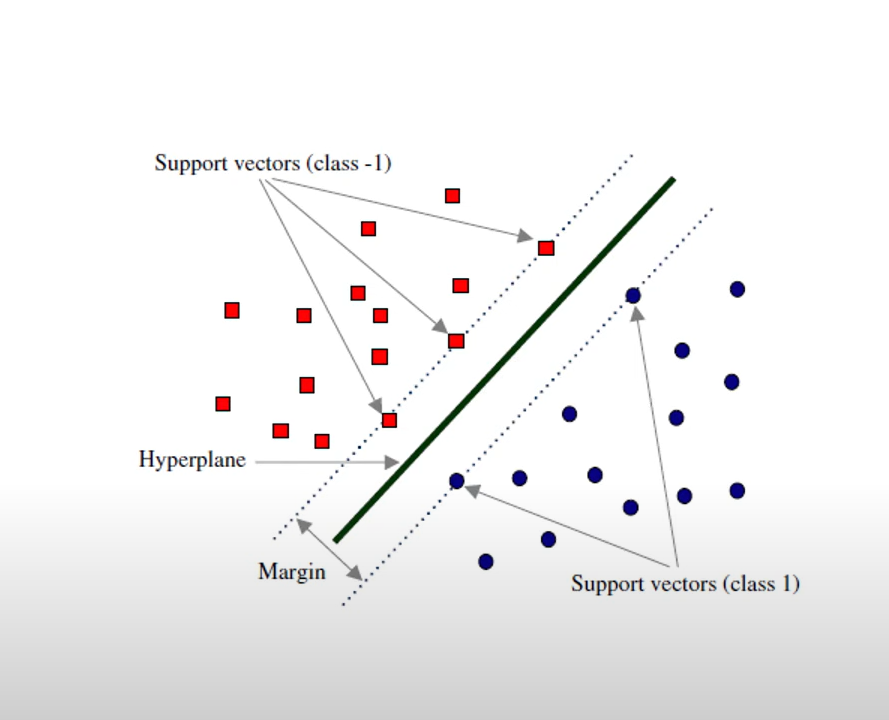

**About**

In SVM classifier we classify the data points into 2 classes.We can use hyperplane to separate them.

Equation of Hyperplane : y = mx - b

If data points are not clearly seprable with given dimention then we try add another dimention so that points are clearly classified in 2 classes.

Kernel is used for the same.

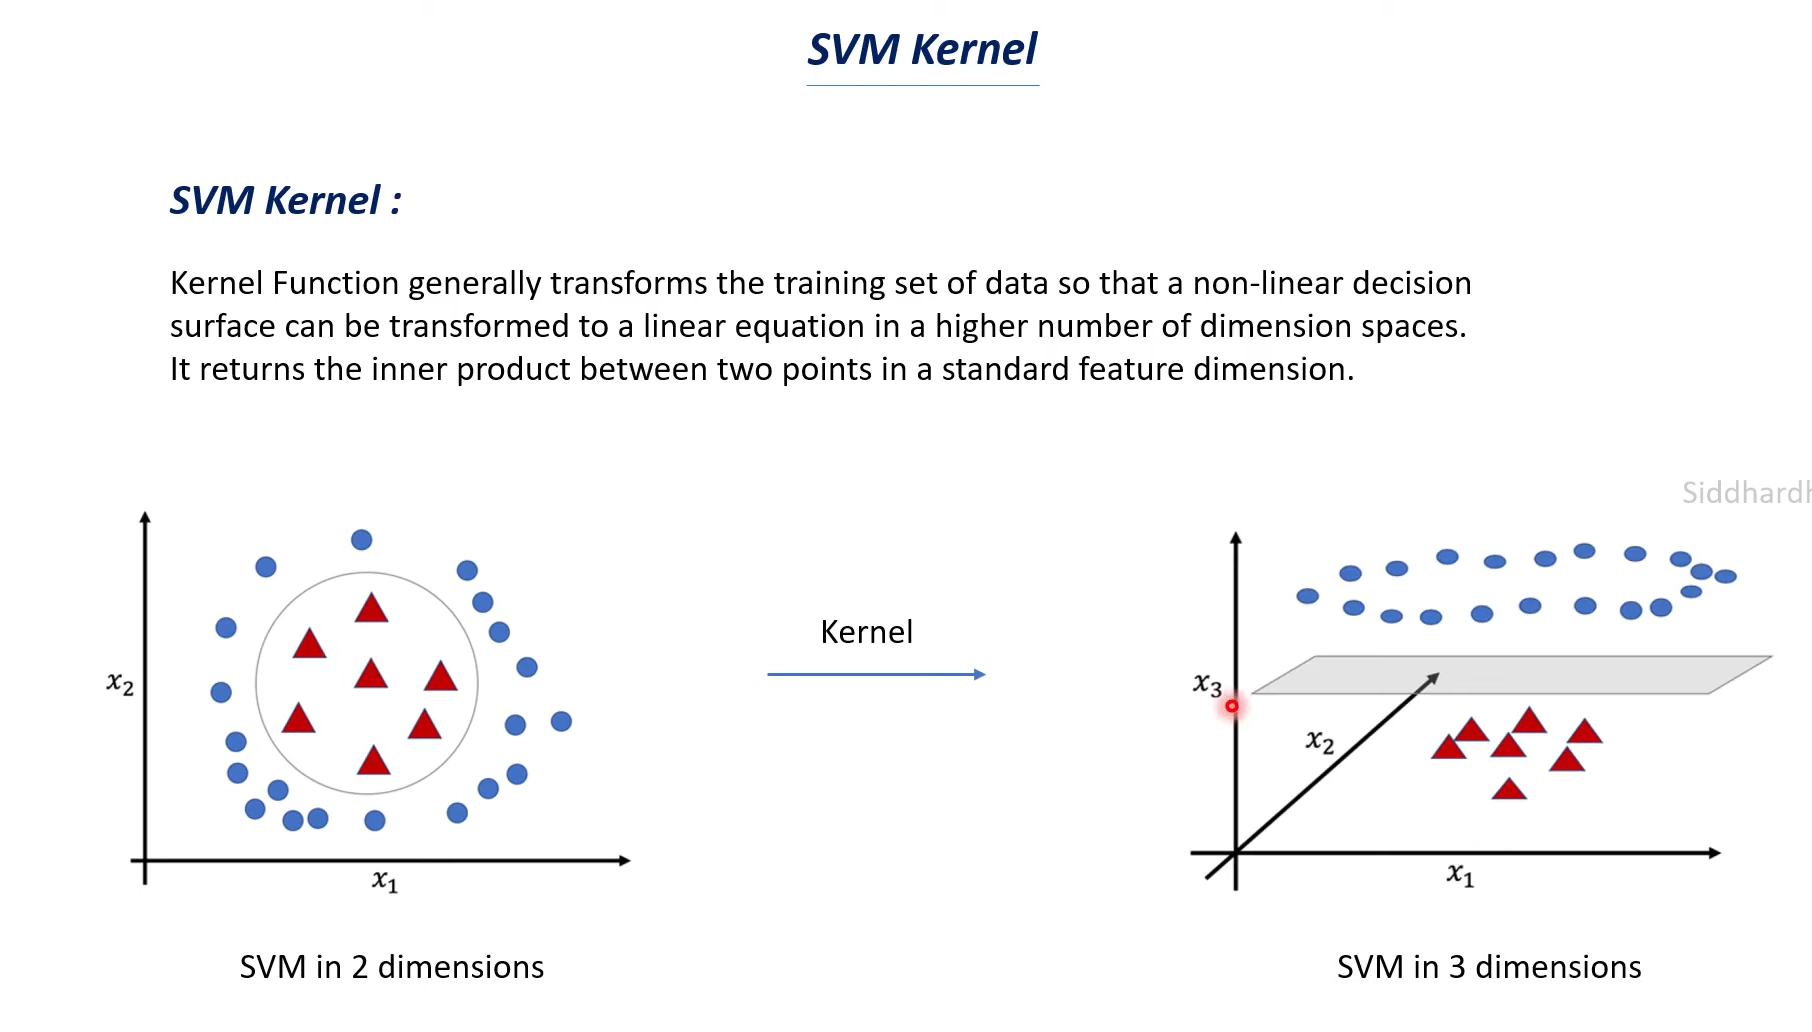

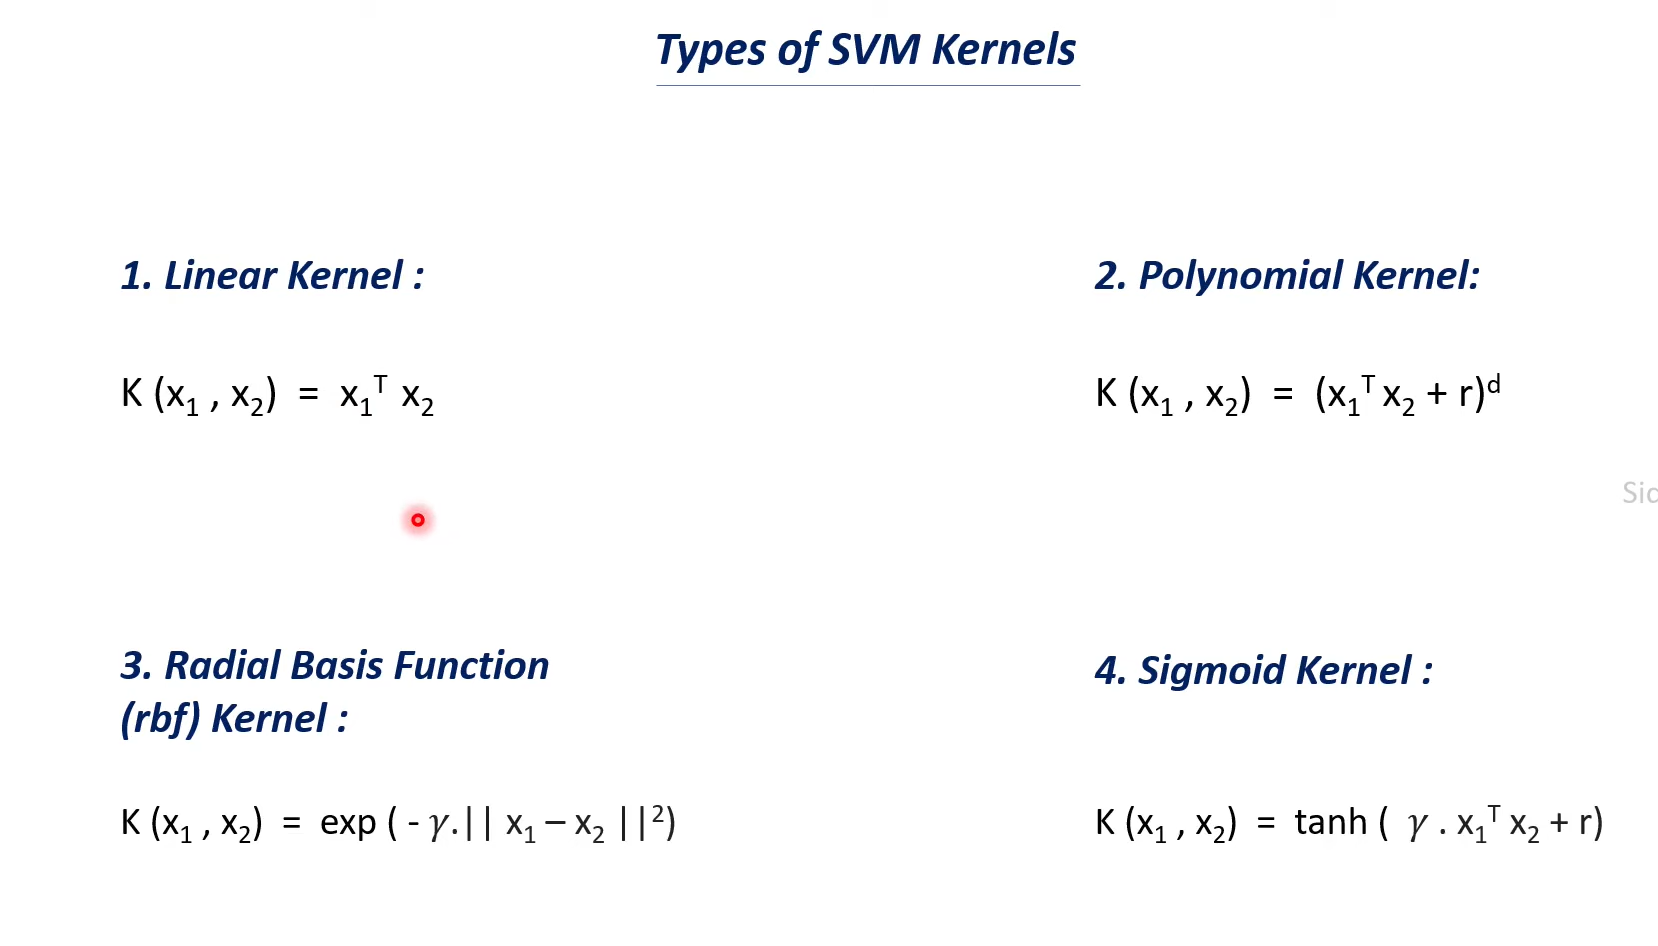

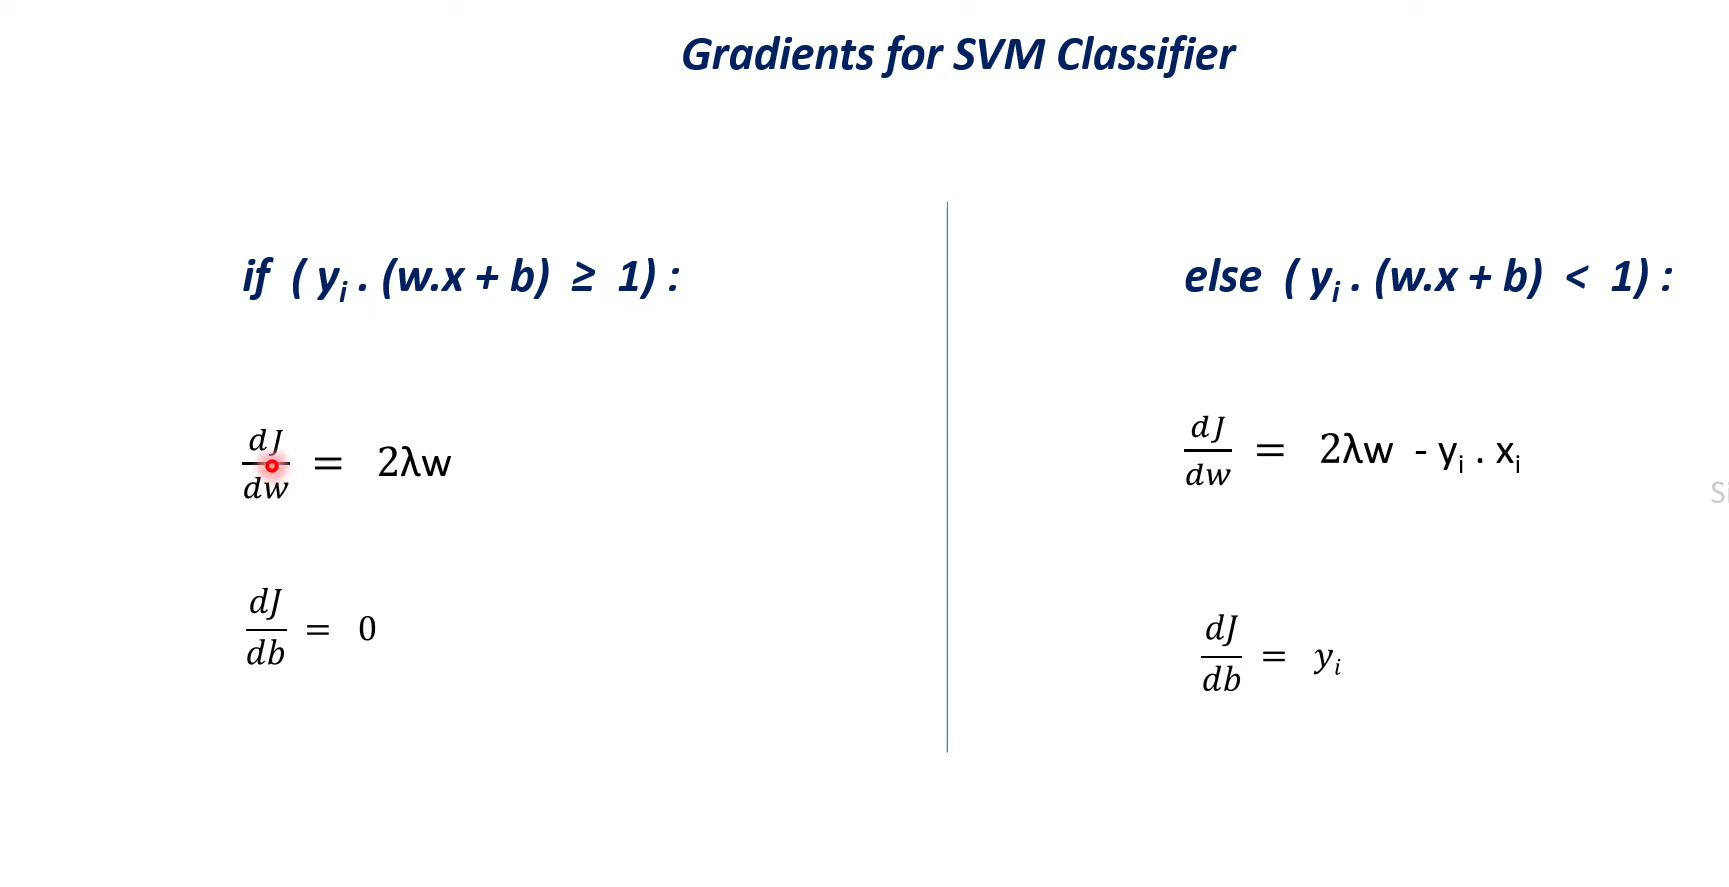

**BUILDING MODAL**

In [ ]:
# importing libraries
import numpy as np

In [ ]:
class SVM_Classifier():

  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, Y):

    self.rows, self.features = X.shape

    #initialising weights and bias value
    self.w = np.zeros(self.features)

    self.bias = 0

    self.X = X

    self.Y = Y

    #implementing gradient descent algorithm for Optimization

    for i in range(self.no_of_iterations) :
      self.update_weights()



  def update_weights(self):

    #label encoding
    y_label = np.where(self.Y <= 0 ,-1 ,1)


    # gradients ( dw, db)
    for index,x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.bias) >= 1

      if (condition == True):
        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot( x_i, y_label[index])
        db = y_label[index]

      self.w = self.w - self.learning_rate * dw

      self.bias = self.bias - self.learning_rate * db



  def predict(self, X):
    output = np.dot(X, self.w) - self.bias
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat



**Implementing SVM Classifier**

In [ ]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
#importing Data
diabetes_data = pd.read_csv("/content/drive/MyDrive/Databases /diabetes.csv")


In [ ]:
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#no of rows and columns
diabetes_data.shape

(768, 9)

In [ ]:
#getting statical meaasures of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
features = diabetes_data.drop(columns="Outcome", axis = 1)
target = diabetes_data["Outcome"]

In [ ]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
scalar = StandardScaler()
scalar.fit(features)

standardized_data = scalar.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = standardized_data

In [ ]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
from os import X_OK
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [ ]:
# trainging the model

classifier = SVM_Classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

classifier.fit(X_train, Y_train)

In [ ]:
#Model Evaluations

#Accuracy Score on training data
X_train_prediction = classifier.predict(X_train)

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("Accuracy on training data : ", training_data_accuracy)


Accuracy on training data :  0.7768729641693811


In [ ]:
#Accuracy Score on testing data
X_test_prediction = classifier.predict(X_test)

testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Accuracy on testing data : ", testing_data_accuracy)

Accuracy on testing data :  0.7532467532467533


In [ ]:
# Preparing predictive system

input_data = (8,	183,	64,	0,	0,	23.3,	0.672,	32)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scalar.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)

if(prediction[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[[ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
